In [59]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np


from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/001029.wav"

In [ ]:



sr, samp = wavfile.read(input_file)
data_off = resample_poly(samp,1,16)
Fs = int(2e3)
dc_off = np.mean(data_off)
data = data_off - dc_off


#frequencies, times, spectrogram = signal.spectrogram(samp, Fs)
analytic_signal = hilbert(data)
hilb_x = np.abs(analytic_signal)

t1 = np.linspace(0,(len(data_off)/Fs),len(data_off))




plt.figure(figsize=([16, 4]))	 # Define figure for plots
plt.plot(t1[Fs*300:int(Fs*300.1)], data[Fs*300:int(Fs*300.1)], label="Data")
plt.plot(t1[Fs*300:int(Fs*300.1)], hilb_x[Fs*300:int(Fs*300.1)], label="Hilbert")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

# Load the audio file

sr, data = wavfile.read(input_file)

# Convert stereo to mono if needed
if len(data.shape) > 1:
    data = np.mean(data, axis=1)  # Average the two channels

# Compute the FFT
N = len(data)  # Total number of samples
fft_result = fft(data)  # Apply Fourier Transform
frequencies = fftfreq(N, 1/sr)  # Get frequency values

# Get the magnitude spectrum
magnitude = np.abs(fft_result)[:N // 2]  # Take only positive frequencies
freqs = frequencies[:N // 2]  # Positive frequency range

# Count the number of significant Fourier components
threshold = np.max(magnitude) * 0.001  # Set a threshold (1% of max amplitude)
num_components = np.sum(magnitude > threshold)

# Plot the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(freqs[1:], magnitude[1:], label="Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title(f"Frequency Spectrum - {num_components} Fourier Components Found")
plt.legend()
plt.show()

print(f"Number of significant Fourier components: {num_components}")


BroadBand Hilbert transform

Hilbert -> kvadrert -> midling filter -> nedsampling -> spectrogram

/var/folders/zg/23sg06wj2kzb1l0qdkk5tr140000gn/T/ipykernel_49768/2341198161.py:15: UserWarning: PySoundFile failed. Trying audioread instead.
  data_org, sr = librosa.load(input_file)
/opt/anaconda3/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


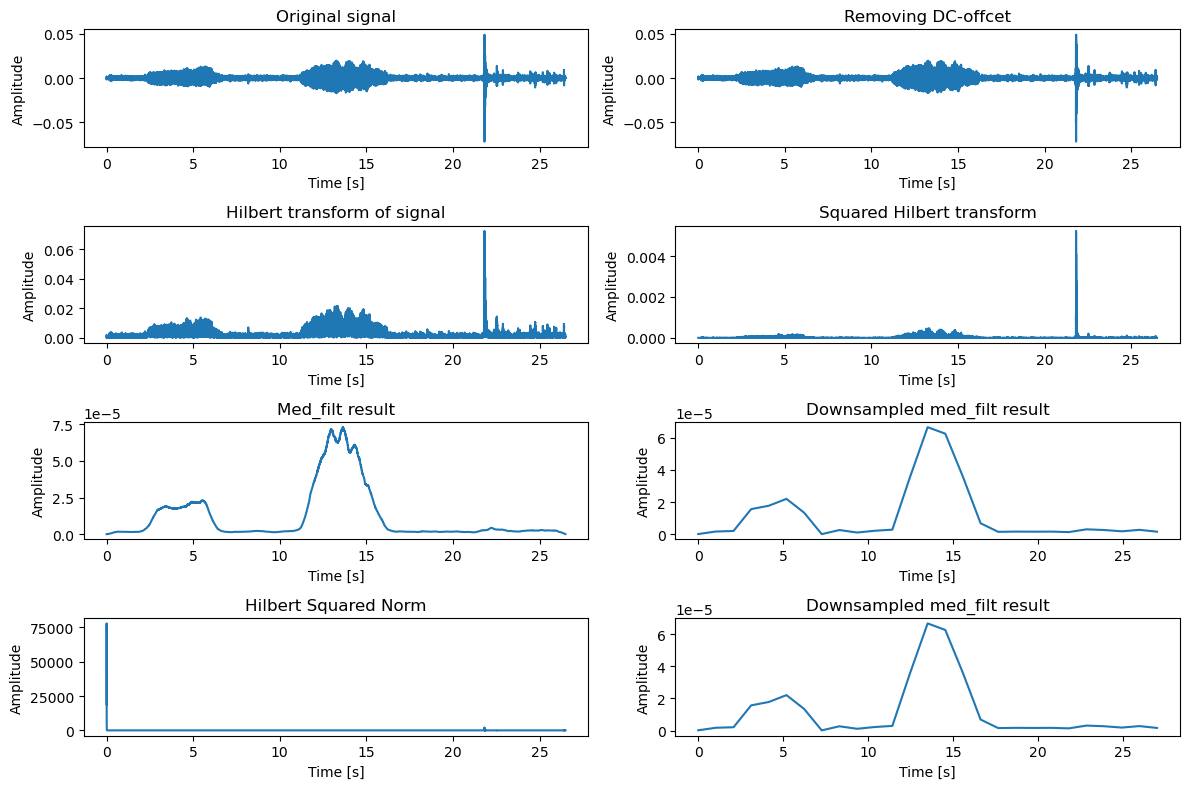

In [102]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fft, fftshift, fftfreq    # FFT and helper functions
import numpy as np



from scipy.signal import hilbert, resample_poly
import librosa

input_file = "/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/Sound_data/Harmonica_tst2.m4a"

#Getting data from wav file
data_org, sr = librosa.load(input_file)

#downsampling audio data
Fs = 2000 #[Hz]
data_offcet = resample_poly(data_org,1,int(sr/Fs))


#Removing Dc-offcet from data
dc_offcet = np.mean(data_offcet)
data = data_offcet - dc_offcet

t = np.linspace(0,(len(data_offcet)/Fs),len(data_offcet))

#Hilbert transform ov data
analytic_signal = np.absolute(hilbert(data))
#Squaring each element
h_2 = np.square(analytic_signal)

#Moving avg filter
med_filt_size = 2001
h_filt = signal.medfilt(h_2,med_filt_size)

#Downsampling
DS_h = resample_poly(h_filt,1,med_filt_size)
DS_Fs = Fs/med_filt_size
DS_t = np.linspace(0,(len(DS_h)/DS_Fs),len(DS_h))

#Normalizing Hilbert
Norm_h = h_2/h_filt



#plotting results
plt.figure(figsize=(12,8))

plt.subplot(4,2,1)
plt.plot(t,data_offcet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,2)
plt.plot(t,data)
plt.title("Removing DC-offcet")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,3)
plt.plot(t,analytic_signal)
plt.title("Hilbert transform of signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,4)
plt.plot(t,h_2)
plt.title("Squared Hilbert transform")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,5)
plt.plot(t,h_filt)
plt.title("Med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,6)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,7)
plt.plot(t[1:],Norm_h[1:])
plt.title("Hilbert Squared Norm")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")

plt.subplot(4,2,8)
plt.plot(DS_t,DS_h)
plt.title("Downsampled med_filt result")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")


plt.tight_layout()
plt.show()

In [103]:
#Hilbert spectrogram
def plot_spectrogram(x, t, fs, n_segment, f_max, s_min):
    """Plot spectrogram of signal x.

    Parameters
    ----------
    x: array of floats
        Signal in time-domain
    t: Numpy array of floats
        Time vector for x
    fs: float
        Sample rate [Samples/s]
    n_segmend: int
        No. of samples in segment for spectrogram calculation
    f_max: float
        Max. on frequency axis
    """
    # Configure spectrogram
    #s_min = -50       # Minimum on the intensity plot. Lower values are 'black'
		
    # Calculate spectrogram
    f, t, sx = signal.spectrogram(x, fs, nperseg=n_segment, detrend=False)
    sx_db = 10*np.log10(sx/sx.max())   # Convert to dB
    		
    # Plot spectrogram
    plt.figure(figsize=(16, 6))  # Define figure for results	
    plt.subplot(1, 1, 1)
    
    plt.pcolormesh(t, f, sx_db, vmin=s_min, cmap='inferno')  # Draw spectrogram image
    print(f.max())		
    plt.xlabel("Time [s]")         # Axis labels and scales
    plt.ylabel("Frequency [Hz]")
    plt.ylim(0, f_max)
    		
    plt.colorbar(label="Magnitude [dB]")  # Colorbar for intensity scale
    plt.show()
    return 0
nperseg = 1000





1000.0


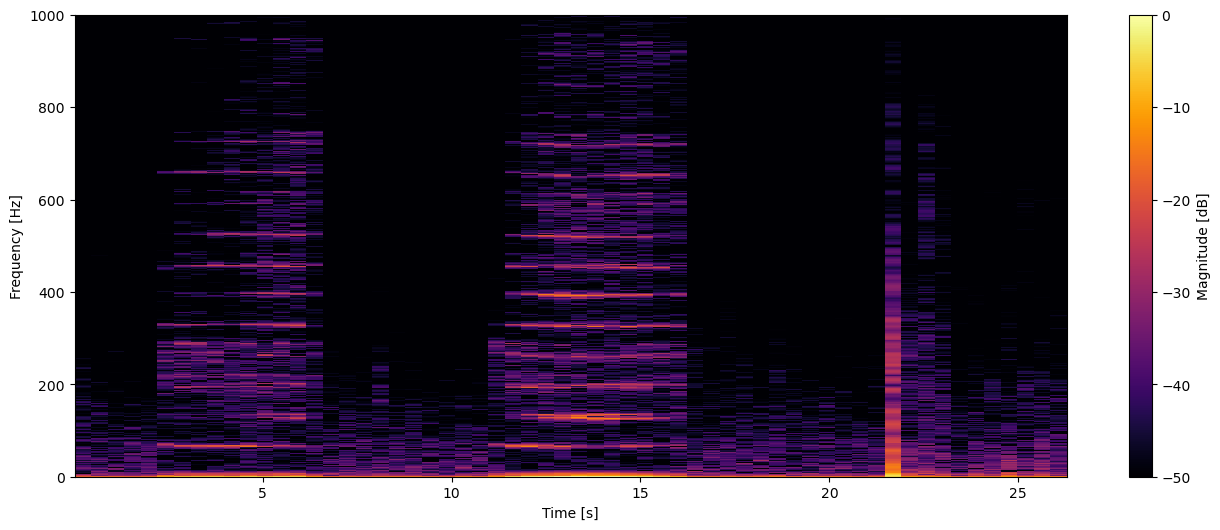

1000.0


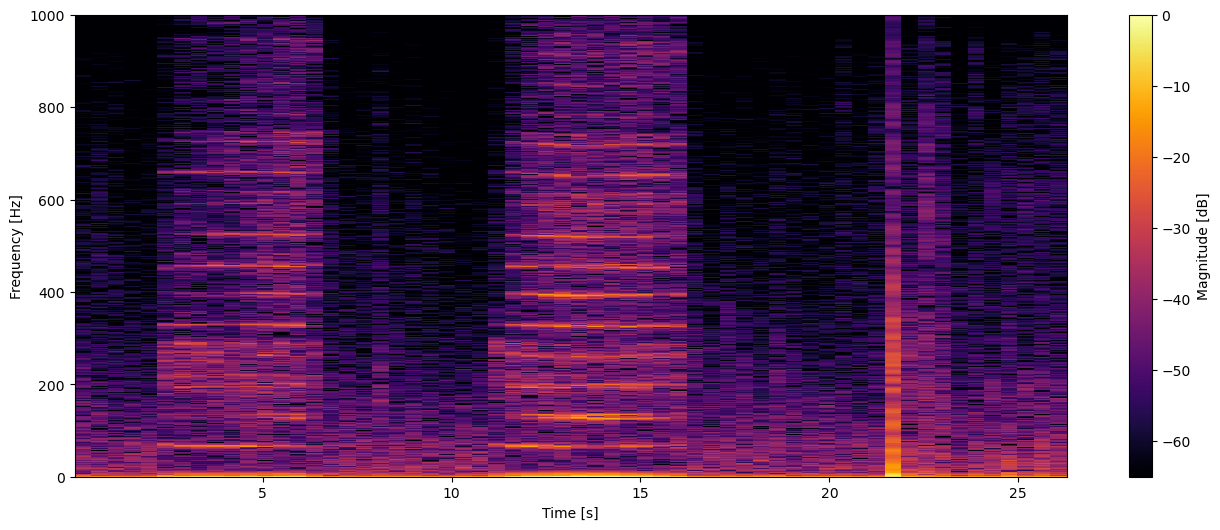

1000.0


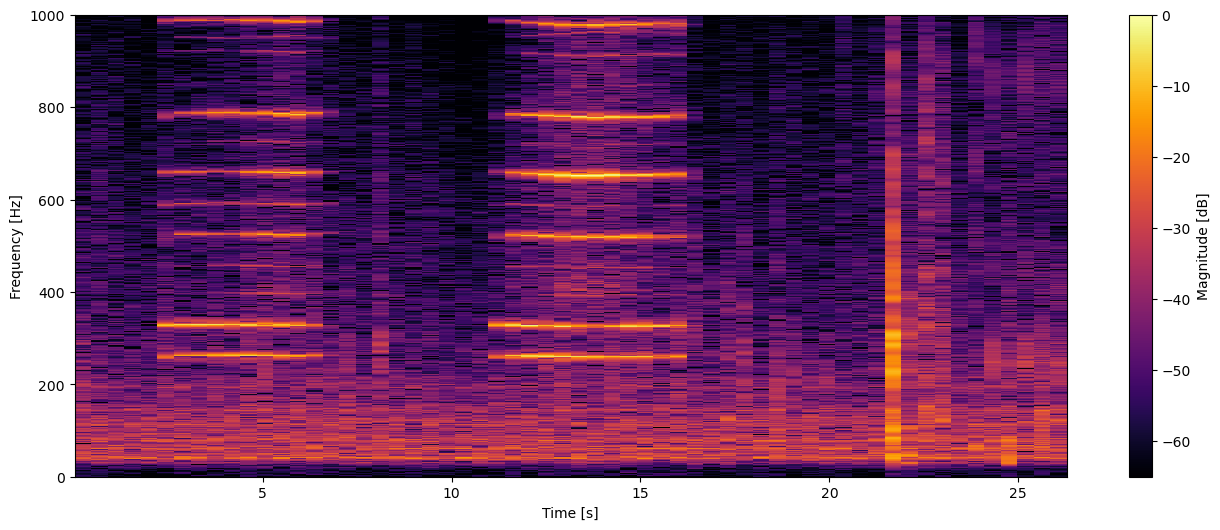

0.4997501249375313


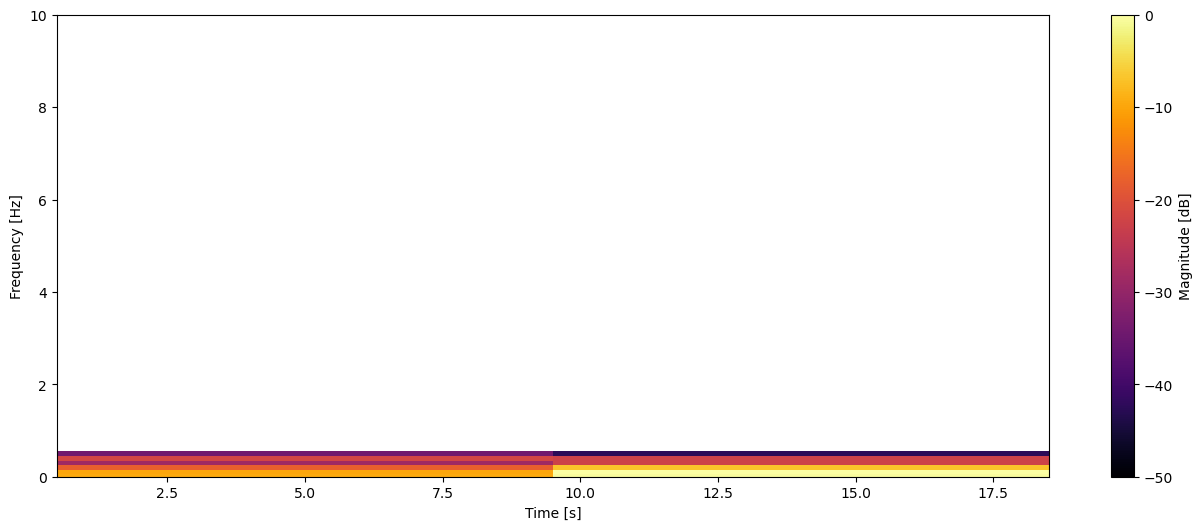

In [104]:
Hilber_spec3 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-50)
Hilber_spec4 = plot_spectrogram(analytic_signal,t,Fs,nperseg, 1000,-65)


org_pec = plot_spectrogram(data,t,Fs,nperseg,1000,-65)
DS_spec = plot_spectrogram(DS_h,DS_t,DS_Fs,10,10,-50)